# Process and plot REPEAT Project Data

In [1]:
#load packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cycler

In [2]:
#set plot style
plt.style.use(['presplot_small'])

n = 6
color = plt.cm.viridis(np.linspace(1,0,n))
color=np.flip(color,axis=0)
plt.rcParams['axes.prop_cycle'] = cycler.cycler('color', color[1:,:])

In [3]:
#import csv as dataframe
df = pd.read_csv ('repeat-data-2022-03-01T18_14_09-08_00.csv')
df.head()

,state,category,subcategory,variable,units,frozen_pol_2022,frozen_pol_2024,frozen_pol_2026,frozen_pol_2028,frozen_pol_2030,...,bbb-nov_pol_2040,bbb-nov_pol_2050,iija_pol_2022,iija_pol_2024,iija_pol_2026,iija_pol_2028,iija_pol_2030,iija_pol_2035,iija_pol_2040,iija_pol_2050
0,National,GHG Emissions,Gross GHGs,Gross GHG emissions - total (excluding changes...,MMT CO2-equivalent,5989.0,5690.0,5779.0,5734.0,5560.0,...,3710.0,4177.0,5987.0,5676.0,5745.0,5687.0,5489.0,5164.0,5206.0,5403.0
1,National,GHG Emissions,Non-CO2 GHGs,Non-CO2 GHG emissions - total,MMT CO2-equivalent,1354.0,1319.0,1357.0,1370.0,1326.0,...,997.0,1008.0,1353.0,1318.0,1354.0,1369.0,1326.0,1171.0,1194.0,1234.0
2,National,GHG Emissions,CO2 by fuel,CO2 Emissions - Total,MMT,4635.0,4371.0,4422.0,4364.0,4234.0,...,2713.0,3169.0,4634.0,4358.0,4391.0,4318.0,4163.0,3992.0,4012.0,4169.0
3,National,GHG Emissions,CO2 by fuel,CO2 Emissions - Coal And Coke,MMT,1212.0,824.0,801.0,832.0,783.0,...,571.0,393.0,1214.0,819.0,836.0,881.0,836.0,780.0,768.0,682.0
4,National,GHG Emissions,CO2 by fuel,CO2 Emissions - Diesel,MMT,619.0,623.0,620.0,611.0,603.0,...,323.0,354.0,617.0,619.0,603.0,572.0,540.0,454.0,399.0,374.0


In [4]:
#print unique subcategories, unique categories, and column names
print(df['category'].unique())
print(df['subcategory'].unique())
print(df.columns)

['GHG Emissions' 'Energy Expenditures' 'Capital Investments' 'Residential'
 'Energy' 'Hydrogen' 'Transportation' 'Electricity' 'Primary Energy' 'CO2'
 'Commercial' 'Labor' 'Air pollution']
['Gross GHGs' 'Non-CO2 GHGs' 'CO2 by fuel' 'Total U.S. expenditures'
 'Change in U.S. energy expenditures'
 'Percent change in U.S. energy expenditures'
 'Change in household energy expenditures' 'Investments by sector'
 'Equipment sales -  Residential Space Heating'
 'Equipment sales -  Residential Water Heating'
 'Final energy use -  Residential Space Heating'
 'Final energy use -  Residential Water Heating'
 'Equipment stocks -  Residential Space Heating'
 'Equipment stocks -  Residential Water Heating' 'Use by carrier'
 'Use by sector' 'Biomass - Corn Ethanol Production'
 'Biomass - Nonwoody Production' 'Biomass - Other Production'
 'Biomass - Woody Production' 'Natural Gas Production' 'Oil Production'
 'Coal Production' 'Demand by sink' 'Supply by source'
 'Final energy use -  Heavy Duty Trucks'

In [5]:
#show that all subcategories are unique (no two categories have the same subcategory)
#so I don't need to filter by category first
test=df.copy()
test[test["category"]=="Primary Energy"].index
test.iloc[190,2]="CO2 by fuel"
#test.loc[test["category"]=="Primary Energy"]
test.groupby('subcategory').filter(lambda x: len(x['category'].unique()) > 1) 
df.groupby('subcategory').filter(lambda x: len(x['category'].unique()) > 1) 

,state,category,subcategory,variable,units,frozen_pol_2022,frozen_pol_2024,frozen_pol_2026,frozen_pol_2028,frozen_pol_2030,...,bbb-nov_pol_2040,bbb-nov_pol_2050,iija_pol_2022,iija_pol_2024,iija_pol_2026,iija_pol_2028,iija_pol_2030,iija_pol_2035,iija_pol_2040,iija_pol_2050


In [6]:
#select only 2022, 2030, 2050 net zero
nz=df[["category","subcategory","variable","units",
           "net-zero_pol_2022","net-zero_pol_2030","net-zero_pol_2050"]]
nz.columns=nz.columns.str.replace('net-zero_pol_','')
nz.head()

#nz[nz['category']=='Electricity']
#nz[nz['category']=='Energy']
#nz[nz['category']=='Primary Energy']

,category,subcategory,variable,units,2022,2030,2050
0,GHG Emissions,Gross GHGs,Gross GHG emissions - total (excluding changes...,MMT CO2-equivalent,5937.0,4155.0,730.0
1,GHG Emissions,Non-CO2 GHGs,Non-CO2 GHG emissions - total,MMT CO2-equivalent,1306.0,1080.0,790.0
2,GHG Emissions,CO2 by fuel,CO2 Emissions - Total,MMT,4631.0,3075.0,-60.1
3,GHG Emissions,CO2 by fuel,CO2 Emissions - Coal And Coke,MMT,1229.0,81.5,12.6
4,GHG Emissions,CO2 by fuel,CO2 Emissions - Diesel,MMT,617.0,498.0,9.6


,2022,2030,2050
Total,82.10,72.100,68.200
Oil,30.30,25.940,5.986
Natural Gas,23.50,23.600,10.500
Coal,12.80,0.786,0.129
Nuclear,8.39,8.510,11.900
Renewables,7.20,13.286,39.702


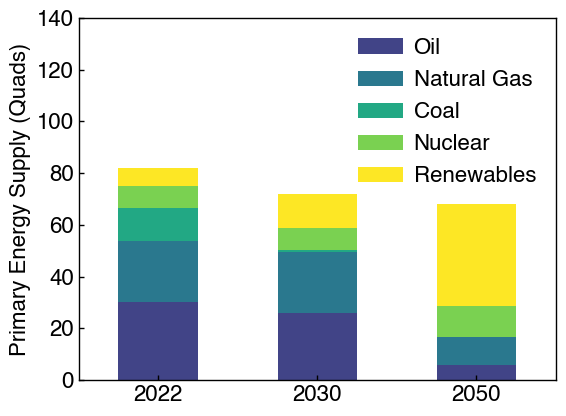

In [7]:
#primary energy - energy by source
primary=nz.loc[nz['category']=='Primary Energy']
primary.insert(4,"Label",['Total','Renewables','Coal','Renewables','Renewables','Natural Gas',
              'Renewables','Oil','Renewables','Oil','Renewables','Nuclear'])
primary.set_index("Label",drop=True)
primary=primary.groupby("Label").sum()
primary.index.name = None
primary=primary.sort_values(by="2022", axis=0, ascending=False)

primary.T.iloc[:,1:].plot.bar(stacked=True,rot=0)
plt.ylabel('Primary Energy Supply (Quads)')
plt.ylim([0,140])

plt.savefig('thesis/energy_supply.pdf')

primary

,2022,2030,2050
Total,61.7,59.80,48.10
Transportation,23.7,21.30,12.70
Industrial,18.1,18.80,19.50
Residential,11.4,11.00,7.88
Commercial,8.5,8.64,8.04


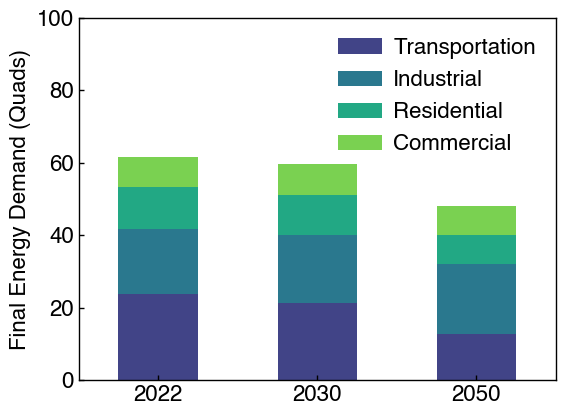

In [8]:
#energy demand by use
energy=nz.loc[nz['subcategory']=='Use by sector']
energy=energy.set_index('variable',drop=True)
energy.index=energy.index.str.replace('Energy - ','')
energy=energy.groupby('variable').sum()
energy.index.name = None
energy=energy.sort_values(by="2022", axis=0, ascending=False)

energy.T.iloc[:,1:].plot.bar(stacked=True,rot=0)
plt.ylabel('Final Energy Demand (Quads)')
plt.ylim([0,100])

plt.savefig('thesis/energy_demand.pdf')

energy

,2022,2030,2050
Total,4288.000,5218.000,11419.00
Fossil Fuels,2354.121,1285.387,1206.51
Nuclear,823.000,835.000,1160.00
Other Renewables,483.170,357.760,365.21
Wind,385.085,1211.000,4695.00
Solar,241.200,1529.500,3992.00


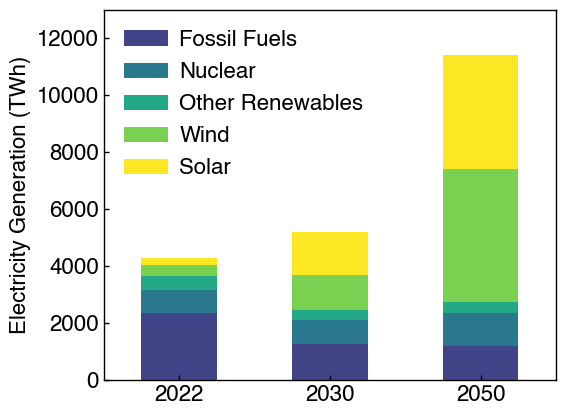

In [9]:
#electricity supply 
gen=nz.loc[nz['category']=='Electricity']
gen=gen.loc[gen['subcategory']=='Generation by type']

gen.insert(4,"Label",['Total','Other Renewables','Fossil Fuels','Fossil Fuels','Other Renewables','Other Renewables',
              'Fossil Fuels','Fossil Fuels','Nuclear','Wind','Wind','Fossil Fuels','Other Renewables',
                      'Solar','Solar'])
gen=gen.set_index("Label",drop=True)
gen=gen.groupby("Label").sum()
gen.index.name = None
gen=gen.sort_values(by="2022", axis=0, ascending=False)

gen.T.iloc[:,1:].plot.bar(stacked=True,rot=0)
plt.ylabel('Electricity Generation (TWh)')
plt.ylim([0,13000])

plt.savefig('thesis/electricity_supply.pdf')

gen

,2022,2030,2050
Total,3773.000,4864.0,10590.0
Buildings,2806.000,3122.0,4004.0
Industrial,934.000,1109.0,1810.0
Vehicles,26.000,451.0,1864.0
Other Transportation,5.990,11.4,48.7
Energy Conversion Load,0.001,170.0,2863.0


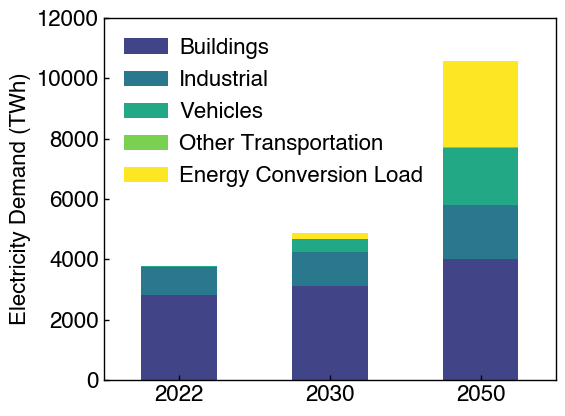

In [10]:
#electricity demand by use
electricity=nz.loc[nz['subcategory']=='Demand by use']
electricity=electricity.set_index('variable',drop=True)
electricity=electricity.groupby('variable').sum()
electricity.index=electricity.index.str.replace('Demand - ','')
electricity.index.name = None
electricity=electricity.sort_values(by="2022", axis=0, ascending=False)

electricity.T.iloc[:,1:].plot.bar(stacked=True,rot=0)
plt.ylabel('Electricity Demand (TWh)')
plt.ylim([0,12000])

plt.savefig('thesis/electricity_demand.pdf')

electricity

,2022,2024,2026,2028,2030,2035,2040,2050
Wind,29.5,29.5,3.23,0.979,6.327,5.56,3.86,3.676
Solar,36.7,36.7,17.20,29.800,45.100,5.40,5.06,13.400


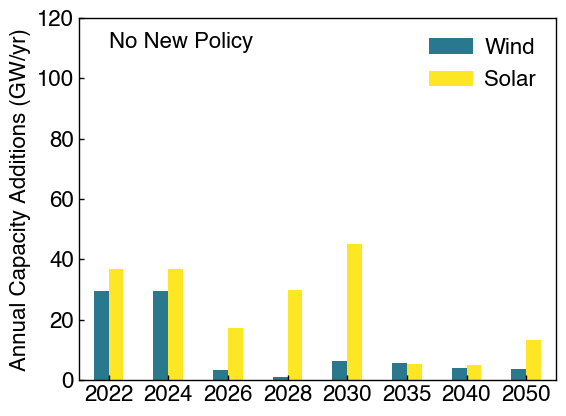

In [11]:
#capacity additions, no new policy
solar=df[(df['subcategory']=='Annual capacity additions') & (df['variable']=='Additions - Solar')]
wind=df[(df['subcategory']=='Annual capacity additions') & 
        ((df['variable']=='Additions - Offshore Wind') | (df['variable']=='Additions - Onshore Wind'))]

wind=wind.groupby("units").sum()

frozen_pol=pd.concat([wind.filter(regex='frozen_pol'),solar.filter(regex='frozen_pol')],axis=0)
frozen_pol=frozen_pol.set_axis(['Wind','Solar'],axis='index')
frozen_pol.columns=frozen_pol.columns.str.replace('frozen_pol_','')

frozen_pol.T.plot.bar(rot=0,color=[color[2,:],color[5,:]])
plt.ylabel('Annual Capacity Additions (GW/yr)')
plt.ylim([0,120])
plt.text(0,110,'No New Policy')

plt.savefig('thesis/capacity_frozen_pol.pdf')


frozen_pol

,2022,2024,2026,2028,2030,2035,2040,2050
Wind,29.5,29.5,39.89,12.642,22.09,28.72,54.3,50.39
Solar,36.2,36.2,46.70,72.200,102.00,18.30,32.4,65.60


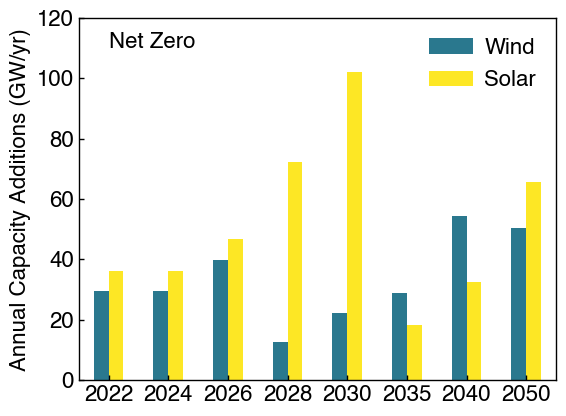

In [12]:
#capacity additions, net zero
net_zero=pd.concat([wind.filter(regex='net-zero'),solar.filter(regex='net-zero')],axis=0)
net_zero=net_zero.set_axis(['Wind','Solar'],axis='index')
net_zero.columns=net_zero.columns.str.replace('net-zero_pol_','')

net_zero.T.plot.bar(rot=0,color=[color[2,:],color[5,:]])
plt.ylabel('Annual Capacity Additions (GW/yr)')
plt.ylim([0,120])
plt.text(0,110,'Net Zero')

plt.savefig('thesis/capacity_net_zero.pdf')

net_zero